In [1]:
import numpy as np
import numpy

In [3]:
def gen_var_combo(num_dim, latent_dim):
    '''
    generates a combination of the latent variables that each function depends on. 
    0 represents the identity.
    
    '''
    vars_ = list(range(latent_dim))
    p = np.full(latent_dim, ((1/(latent_dim))))
    #p[0] = .5
    var_combo = np.random.choice(vars_, size = (num_dim, latent_dim), p = p)
    return var_combo

In [4]:
def gen_func_combo(num_dim, latent_dim):
    '''
    generates a random function dependant on latent dimesnions for each dimnesion
    
    '''
    funcs = ['+', '-', '*', '/']
    func_combo = np.random.choice(funcs, size = (num_dim, latent_dim-1))
    return func_combo

In [5]:
def gen_latent_space(a, num_samples, num_dim, num_latent_dim, distribution = 'uniform', num_gaussians = 3):
    '''
    Generates a num_samples by num_dimensions matrix where each dimension is a function
    of the latent dimensions.
    
    '''
 
    latent_samples = np.random.uniform(high = a, size = (num_samples, num_latent_dim))
    if distribution == 'gaussian':
        
        

    
    var_combo, func_combo, weights = gen_space_params(num_dim, num_latent_dim)

    super_sample = []
    for sample in range(num_samples):
        dimension =[]
        for dim in range(num_dim):
            weight = np.multiply(latent_samples[sample, :], weights[dim])
            dem = weight[var_combo[dim, 0]]
            for lat in range(num_latent_dim-1):
                if(func_combo[dim, lat] == '+'):
                    dem = dem + weight[int(var_combo[dim, lat])]
                elif(func_combo[dim, lat] == '-'):
                    dem = dem + weight[int(var_combo[dim, lat])]
                elif (func_combo[dim, lat] == '*'):
                    dem = dem * weight[int(var_combo[dim, lat])]
                elif (func_combo[dim, lat] == '/'):
                    dem = dem * weight[int(var_combo[dim, lat])]
            dimension.append(dem)
        #print(dimension)
        #dimension = np.concatenate(dimension)
        super_sample.append(dimension)
    return numpy.array(super_sample), latent_samples

In [6]:
def gen_space_params(num_dim, num_latent_dim):
    '''
    gets the parameters used to construct latent space
    
    '''
    var_combo = gen_var_combo(num_dim, num_latent_dim)
    func_combo = gen_func_combo(num_dim, num_latent_dim)
    weights = np.random.rand(num_dim, num_latent_dim)
    return var_combo, func_combo, weights

In [7]:
samp, lat =gen_latent_space(10, 6000, 60, 4)

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_dim = 30
# this is our input placeholder
input_img = Input(shape=(60,))
# "encoded" is the encoded representation of the input
x = Dense(input_dim)(input_img)
x = Dense(input_dim)(input_img)
encoded = Dense(encoding_dim, activation='relu')(x)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(60, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [10]:
encoder = Model(input_img, encoded)

In [11]:
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='sgd', loss='mean_squared_error')

In [13]:
samp.shape

(6000, 60)

In [14]:
samp.max(axis = 0).shape

(60,)

In [15]:
x_train = samp[:5000, :]/samp[:5000, :].max(axis = 0)
x_test = samp[5000:, :]/samp[:5000, :].max(axis = 0)

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=5000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 5000 samples, validate on 1000 samples
Epoch 1/5000
5000/5000 [==============================] - 1s 230us/step - loss: 0.1164 - val_loss: 0.1160
Epoch 2/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1162 - val_loss: 0.1159
Epoch 3/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.1161 - val_loss: 0.1158
Epoch 4/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.1160 - val_loss: 0.1156
Epoch 5/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1158 - val_loss: 0.1155
Epoch 6/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1157 - val_loss: 0.1153
Epoch 7/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.1155 - val_loss: 0.1152
Epoch 8/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.1154 - val_loss: 0.1151
Epoch 9/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.1153 - val_loss: 0.1149
Epoch 

Epoch 78/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1067 - val_loss: 0.1061
Epoch 79/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.1066 - val_loss: 0.1060
Epoch 80/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1065 - val_loss: 0.1059
Epoch 81/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1063 - val_loss: 0.1057
Epoch 82/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1062 - val_loss: 0.1056
Epoch 83/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1061 - val_loss: 0.1055
Epoch 84/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1060 - val_loss: 0.1053
Epoch 85/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1058 - val_loss: 0.1052
Epoch 86/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.1057 - val_loss: 0.1051
Epoch 87/5000
5000/5000 [=====================

Epoch 155/5000
5000/5000 [==============================] - 0s 15us/step - loss: 0.0958 - val_loss: 0.0946
Epoch 156/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0956 - val_loss: 0.0944
Epoch 157/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0954 - val_loss: 0.0942
Epoch 158/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0953 - val_loss: 0.0940
Epoch 159/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0951 - val_loss: 0.0939
Epoch 160/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0949 - val_loss: 0.0937
Epoch 161/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0948 - val_loss: 0.0935
Epoch 162/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0946 - val_loss: 0.0933
Epoch 163/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0944 - val_loss: 0.0932
Epoch 164/5000
5000/5000 [===========

5000/5000 [==============================] - 0s 13us/step - loss: 0.0699 - val_loss: 0.0669
Epoch 308/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0697 - val_loss: 0.0668
Epoch 309/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0696 - val_loss: 0.0666
Epoch 310/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0695 - val_loss: 0.0665
Epoch 311/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0694 - val_loss: 0.0664
Epoch 312/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0692 - val_loss: 0.0662
Epoch 313/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0691 - val_loss: 0.0661
Epoch 314/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0690 - val_loss: 0.0659
Epoch 315/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0688 - val_loss: 0.0658
Epoch 316/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 14us/step - loss: 0.0580 - val_loss: 0.0545
Epoch 460/5000
5000/5000 [==============================] - 0s 15us/step - loss: 0.0580 - val_loss: 0.0544
Epoch 461/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0579 - val_loss: 0.0544
Epoch 462/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0579 - val_loss: 0.0543
Epoch 463/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0579 - val_loss: 0.0543
Epoch 464/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0578 - val_loss: 0.0542
Epoch 465/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0578 - val_loss: 0.0542
Epoch 466/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0577 - val_loss: 0.0542
Epoch 467/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0577 - val_loss: 0.0541
Epoch 468/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0525 - val_loss: 0.0494
Epoch 612/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0525 - val_loss: 0.0493
Epoch 613/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0524 - val_loss: 0.0493
Epoch 614/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0524 - val_loss: 0.0493
Epoch 615/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0524 - val_loss: 0.0492
Epoch 616/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0523 - val_loss: 0.0492
Epoch 617/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0523 - val_loss: 0.0492
Epoch 618/5000
5000/5000 [==============================] - 0s 15us/step - loss: 0.0523 - val_loss: 0.0491
Epoch 619/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0522 - val_loss: 0.0491
Epoch 620/5000
5000/5000 [==========================

Epoch 763/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0464 - val_loss: 0.0443
Epoch 764/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0463 - val_loss: 0.0443
Epoch 765/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0463 - val_loss: 0.0443
Epoch 766/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0462 - val_loss: 0.0442
Epoch 767/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0462 - val_loss: 0.0442
Epoch 768/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0461 - val_loss: 0.0441
Epoch 769/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0461 - val_loss: 0.0441
Epoch 770/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0460 - val_loss: 0.0441
Epoch 771/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0460 - val_loss: 0.0440
Epoch 772/5000
5000/5000 [===========

5000/5000 [==============================] - 0s 13us/step - loss: 0.0428 - val_loss: 0.0415
Epoch 840/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0427 - val_loss: 0.0414
Epoch 841/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0427 - val_loss: 0.0414
Epoch 842/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0426 - val_loss: 0.0413
Epoch 843/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0426 - val_loss: 0.0413
Epoch 844/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0426 - val_loss: 0.0413
Epoch 845/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0425 - val_loss: 0.0412
Epoch 846/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0425 - val_loss: 0.0412
Epoch 847/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0424 - val_loss: 0.0412
Epoch 848/5000
5000/5000 [==========================

5000/5000 [==============================] - ETA: 0s - loss: 0.037 - 0s 13us/step - loss: 0.0373 - val_loss: 0.0366
Epoch 992/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0372 - val_loss: 0.0366
Epoch 993/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0372 - val_loss: 0.0366
Epoch 994/5000
5000/5000 [==============================] - ETA: 0s - loss: 0.037 - 0s 13us/step - loss: 0.0372 - val_loss: 0.0366
Epoch 995/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0372 - val_loss: 0.0365
Epoch 996/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0371 - val_loss: 0.0365
Epoch 997/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0371 - val_loss: 0.0365
Epoch 998/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0371 - val_loss: 0.0365
Epoch 999/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0371 - val_loss: 0.0365
Epoc

Epoch 1066/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0356 - val_loss: 0.0351
Epoch 1067/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0356 - val_loss: 0.0351
Epoch 1068/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0356 - val_loss: 0.0351
Epoch 1069/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0355 - val_loss: 0.0351
Epoch 1070/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0355 - val_loss: 0.0350
Epoch 1071/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0355 - val_loss: 0.0350
Epoch 1072/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0355 - val_loss: 0.0350
Epoch 1073/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0355 - val_loss: 0.0350
Epoch 1074/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0354 - val_loss: 0.0350
Epoch 1075/5000
5000/5000 [=

Epoch 1142/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0344 - val_loss: 0.0340
Epoch 1143/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0343 - val_loss: 0.0339
Epoch 1144/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0343 - val_loss: 0.0339
Epoch 1145/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0343 - val_loss: 0.0339
Epoch 1146/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0343 - val_loss: 0.0339
Epoch 1147/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0343 - val_loss: 0.0339
Epoch 1148/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0343 - val_loss: 0.0339
Epoch 1149/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0343 - val_loss: 0.0339
Epoch 1150/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0342 - val_loss: 0.0338
Epoch 1151/5000
5000/5000 [=

Epoch 1218/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0334 - val_loss: 0.0331
Epoch 1219/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0334 - val_loss: 0.0330
Epoch 1220/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0334 - val_loss: 0.0330
Epoch 1221/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0334 - val_loss: 0.0330
Epoch 1222/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0334 - val_loss: 0.0330
Epoch 1223/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0334 - val_loss: 0.0330
Epoch 1224/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0334 - val_loss: 0.0330
Epoch 1225/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0333 - val_loss: 0.0330
Epoch 1226/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0333 - val_loss: 0.0330
Epoch 1227/5000
5000/5000 [=

Epoch 1294/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0327 - val_loss: 0.0323
Epoch 1295/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0327 - val_loss: 0.0323
Epoch 1296/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0327 - val_loss: 0.0323
Epoch 1297/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0327 - val_loss: 0.0323
Epoch 1298/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0326 - val_loss: 0.0323
Epoch 1299/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0326 - val_loss: 0.0323
Epoch 1300/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0326 - val_loss: 0.0323
Epoch 1301/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0326 - val_loss: 0.0323
Epoch 1302/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0326 - val_loss: 0.0323
Epoch 1303/5000
5000/5000 [=

Epoch 1370/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0321 - val_loss: 0.0317
Epoch 1371/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0321 - val_loss: 0.0317
Epoch 1372/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0321 - val_loss: 0.0317
Epoch 1373/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0321 - val_loss: 0.0317
Epoch 1374/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0320 - val_loss: 0.0317
Epoch 1375/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0320 - val_loss: 0.0317
Epoch 1376/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0320 - val_loss: 0.0317
Epoch 1377/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0320 - val_loss: 0.0317
Epoch 1378/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0320 - val_loss: 0.0317
Epoch 1379/5000
5000/5000 [=

Epoch 1446/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0316 - val_loss: 0.0312
Epoch 1447/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0315 - val_loss: 0.0312
Epoch 1448/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0315 - val_loss: 0.0312
Epoch 1449/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0315 - val_loss: 0.0312
Epoch 1450/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0315 - val_loss: 0.0312
Epoch 1451/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0315 - val_loss: 0.0312
Epoch 1452/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0315 - val_loss: 0.0312
Epoch 1453/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0315 - val_loss: 0.0312
Epoch 1454/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0315 - val_loss: 0.0312
Epoch 1455/5000
5000/5000 [=

Epoch 1597/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0307 - val_loss: 0.0304
Epoch 1598/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0307 - val_loss: 0.0304
Epoch 1599/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0307 - val_loss: 0.0303
Epoch 1600/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0306 - val_loss: 0.0303
Epoch 1601/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0306 - val_loss: 0.0303
Epoch 1602/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0306 - val_loss: 0.0303
Epoch 1603/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0306 - val_loss: 0.0303
Epoch 1604/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0306 - val_loss: 0.0303
Epoch 1605/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0306 - val_loss: 0.0303
Epoch 1606/5000
5000/5000 [=

Epoch 1673/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0303 - val_loss: 0.0300
Epoch 1674/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0303 - val_loss: 0.0300
Epoch 1675/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0302 - val_loss: 0.0300
Epoch 1676/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0302 - val_loss: 0.0299
Epoch 1677/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0302 - val_loss: 0.0299
Epoch 1678/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0302 - val_loss: 0.0299
Epoch 1679/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0302 - val_loss: 0.0299
Epoch 1680/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0302 - val_loss: 0.0299
Epoch 1681/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0302 - val_loss: 0.0299
Epoch 1682/5000
5000/5000 [=

Epoch 1749/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0299 - val_loss: 0.0296
Epoch 1750/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0299 - val_loss: 0.0296
Epoch 1751/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0299 - val_loss: 0.0296
Epoch 1752/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0299 - val_loss: 0.0296
Epoch 1753/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0298 - val_loss: 0.0296
Epoch 1754/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0298 - val_loss: 0.0296
Epoch 1755/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0298 - val_loss: 0.0295
Epoch 1756/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0298 - val_loss: 0.0295
Epoch 1757/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0298 - val_loss: 0.0295
Epoch 1758/5000
5000/5000 [=

Epoch 1900/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0291 - val_loss: 0.0288
Epoch 1901/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0291 - val_loss: 0.0288
Epoch 1902/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0291 - val_loss: 0.0288
Epoch 1903/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0291 - val_loss: 0.0288
Epoch 1904/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0291 - val_loss: 0.0288
Epoch 1905/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0291 - val_loss: 0.0288
Epoch 1906/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0291 - val_loss: 0.0288
Epoch 1907/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0291 - val_loss: 0.0288
Epoch 1908/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0291 - val_loss: 0.0288
Epoch 1909/5000
5000/5000 [=

5000/5000 [==============================] - 0s 14us/step - loss: 0.0284 - val_loss: 0.0281
Epoch 2052/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0284 - val_loss: 0.0281
Epoch 2053/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0284 - val_loss: 0.0281
Epoch 2054/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0283 - val_loss: 0.0281
Epoch 2055/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0283 - val_loss: 0.0281
Epoch 2056/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0283 - val_loss: 0.0281
Epoch 2057/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0283 - val_loss: 0.0281
Epoch 2058/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0283 - val_loss: 0.0281
Epoch 2059/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0283 - val_loss: 0.0280
Epoch 2060/5000
5000/5000 [=================

Epoch 2127/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0280 - val_loss: 0.0277
Epoch 2128/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0280 - val_loss: 0.0277
Epoch 2129/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0280 - val_loss: 0.0277
Epoch 2130/5000
5000/5000 [==============================] - ETA: 0s - loss: 0.028 - 0s 13us/step - loss: 0.0280 - val_loss: 0.0277
Epoch 2131/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0280 - val_loss: 0.0277
Epoch 2132/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0280 - val_loss: 0.0277
Epoch 2133/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0280 - val_loss: 0.0277
Epoch 2134/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0279 - val_loss: 0.0277
Epoch 2135/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0279 - val_loss: 0.0277
Epoc

5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0270
Epoch 2278/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0270
Epoch 2279/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0270
Epoch 2280/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0270
Epoch 2281/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0269
Epoch 2282/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0269
Epoch 2283/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0269
Epoch 2284/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0269
Epoch 2285/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0269
Epoch 2286/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0268 - val_loss: 0.0266
Epoch 2354/5000
5000/5000 [==============================] - ETA: 0s - loss: 0.026 - 0s 13us/step - loss: 0.0268 - val_loss: 0.0266
Epoch 2355/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0268 - val_loss: 0.0266
Epoch 2356/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0268 - val_loss: 0.0266
Epoch 2357/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0268 - val_loss: 0.0266
Epoch 2358/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0268 - val_loss: 0.0266
Epoch 2359/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0268 - val_loss: 0.0266
Epoch 2360/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0268 - val_loss: 0.0265
Epoch 2361/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0268 - val_loss: 0.0265
Epoch 2362/5000
5000

5000/5000 [==============================] - 0s 13us/step - loss: 0.0260 - val_loss: 0.0258
Epoch 2505/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0260 - val_loss: 0.0258
Epoch 2506/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0260 - val_loss: 0.0258
Epoch 2507/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0260 - val_loss: 0.0258
Epoch 2508/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0260 - val_loss: 0.0258
Epoch 2509/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0260 - val_loss: 0.0258
Epoch 2510/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0260 - val_loss: 0.0258
Epoch 2511/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0260 - val_loss: 0.0258
Epoch 2512/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0260 - val_loss: 0.0258
Epoch 2513/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0253 - val_loss: 0.0250
Epoch 2656/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0252 - val_loss: 0.0250
Epoch 2657/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0252 - val_loss: 0.0250
Epoch 2658/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0252 - val_loss: 0.0250
Epoch 2659/5000
5000/5000 [==============================] - 0s 15us/step - loss: 0.0252 - val_loss: 0.0250
Epoch 2660/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0252 - val_loss: 0.0250
Epoch 2661/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0252 - val_loss: 0.0250
Epoch 2662/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0252 - val_loss: 0.0250
Epoch 2663/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0252 - val_loss: 0.0250
Epoch 2664/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0249 - val_loss: 0.0246
Epoch 2732/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0248 - val_loss: 0.0246
Epoch 2733/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0248 - val_loss: 0.0246
Epoch 2734/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0248 - val_loss: 0.0246
Epoch 2735/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0248 - val_loss: 0.0246
Epoch 2736/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0248 - val_loss: 0.0246
Epoch 2737/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0248 - val_loss: 0.0246
Epoch 2738/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0248 - val_loss: 0.0246
Epoch 2739/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0248 - val_loss: 0.0246
Epoch 2740/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0242
Epoch 2808/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0242
Epoch 2809/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0242
Epoch 2810/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0242
Epoch 2811/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0242
Epoch 2812/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0242
Epoch 2813/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0242
Epoch 2814/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0242
Epoch 2815/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0242
Epoch 2816/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0237 - val_loss: 0.0235
Epoch 2958/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0237 - val_loss: 0.0235
Epoch 2959/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0236 - val_loss: 0.0234
Epoch 2960/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0236 - val_loss: 0.0234
Epoch 2961/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0236 - val_loss: 0.0234
Epoch 2962/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0236 - val_loss: 0.0234
Epoch 2963/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0236 - val_loss: 0.0234
Epoch 2964/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0236 - val_loss: 0.0234
Epoch 2965/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0236 - val_loss: 0.0234
Epoch 2966/5000
5000/5000 [=================

Epoch 3033/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0233 - val_loss: 0.0231
Epoch 3034/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0233 - val_loss: 0.0231
Epoch 3035/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0232 - val_loss: 0.0231
Epoch 3036/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0232 - val_loss: 0.0231
Epoch 3037/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0232 - val_loss: 0.0231
Epoch 3038/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0232 - val_loss: 0.0230
Epoch 3039/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0232 - val_loss: 0.0230
Epoch 3040/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0232 - val_loss: 0.0230
Epoch 3041/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0232 - val_loss: 0.0230
Epoch 3042/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0225 - val_loss: 0.0223
Epoch 3185/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0225 - val_loss: 0.0223
Epoch 3186/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0225 - val_loss: 0.0223
Epoch 3187/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0225 - val_loss: 0.0223
Epoch 3188/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0225 - val_loss: 0.0223
Epoch 3189/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0225 - val_loss: 0.0223
Epoch 3190/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0225 - val_loss: 0.0223
Epoch 3191/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0225 - val_loss: 0.0223
Epoch 3192/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0224 - val_loss: 0.0223
Epoch 3193/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0219
Epoch 3261/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0219
Epoch 3262/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0219
Epoch 3263/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0219
Epoch 3264/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0221 - val_loss: 0.0219
Epoch 3265/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0221 - val_loss: 0.0219
Epoch 3266/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0221 - val_loss: 0.0219
Epoch 3267/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0221 - val_loss: 0.0219
Epoch 3268/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0221 - val_loss: 0.0219
Epoch 3269/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0217 - val_loss: 0.0216
Epoch 3337/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0217 - val_loss: 0.0216
Epoch 3338/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0217 - val_loss: 0.0216
Epoch 3339/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0217 - val_loss: 0.0216
Epoch 3340/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0217 - val_loss: 0.0216
Epoch 3341/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0217 - val_loss: 0.0216
Epoch 3342/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0217 - val_loss: 0.0216
Epoch 3343/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0217 - val_loss: 0.0215
Epoch 3344/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0217 - val_loss: 0.0215
Epoch 3345/5000
5000/5000 [=================

Epoch 3412/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0214 - val_loss: 0.0212
Epoch 3413/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0214 - val_loss: 0.0212
Epoch 3414/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0214 - val_loss: 0.0212
Epoch 3415/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0214 - val_loss: 0.0212
Epoch 3416/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0214 - val_loss: 0.0212
Epoch 3417/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0213 - val_loss: 0.0212
Epoch 3418/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0213 - val_loss: 0.0212
Epoch 3419/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0213 - val_loss: 0.0212
Epoch 3420/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0213 - val_loss: 0.0212
Epoch 3421/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0207 - val_loss: 0.0205
Epoch 3564/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0207 - val_loss: 0.0205
Epoch 3565/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0207 - val_loss: 0.0205
Epoch 3566/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0207 - val_loss: 0.0205
Epoch 3567/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0207 - val_loss: 0.0205
Epoch 3568/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0207 - val_loss: 0.0205
Epoch 3569/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0207 - val_loss: 0.0205
Epoch 3570/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0206 - val_loss: 0.0205
Epoch 3571/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0206 - val_loss: 0.0205
Epoch 3572/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 3640/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 3641/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 3642/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 3643/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 3644/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 3645/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 3646/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 3647/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0203 - val_loss: 0.0202
Epoch 3648/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 14us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 3716/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 3717/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 3718/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 3719/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 3720/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 3721/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 3722/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 3723/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 3724/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3792/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3793/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3794/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3795/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3796/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3797/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3798/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3799/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3800/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0194 - val_loss: 0.0193
Epoch 3868/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0194 - val_loss: 0.0193
Epoch 3869/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0194 - val_loss: 0.0193
Epoch 3870/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0194 - val_loss: 0.0193
Epoch 3871/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0194 - val_loss: 0.0193
Epoch 3872/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0194 - val_loss: 0.0193
Epoch 3873/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0194 - val_loss: 0.0193
Epoch 3874/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0194 - val_loss: 0.0193
Epoch 3875/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0194 - val_loss: 0.0193
Epoch 3876/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 14us/step - loss: 0.0189 - val_loss: 0.0188
Epoch 4018/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0189 - val_loss: 0.0188
Epoch 4019/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0189 - val_loss: 0.0188
Epoch 4020/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0189 - val_loss: 0.0188
Epoch 4021/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0189 - val_loss: 0.0188
Epoch 4022/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0189 - val_loss: 0.0188
Epoch 4023/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0189 - val_loss: 0.0188
Epoch 4024/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0188 - val_loss: 0.0187
Epoch 4025/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0188 - val_loss: 0.0187
Epoch 4026/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4094/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4095/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4096/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4097/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4098/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4099/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4100/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4101/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0186 - val_loss: 0.0185
Epoch 4102/5000
5000/5000 [=================

Epoch 4169/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0184 - val_loss: 0.0183
Epoch 4170/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0184 - val_loss: 0.0183
Epoch 4171/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0184 - val_loss: 0.0183
Epoch 4172/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0183 - val_loss: 0.0183
Epoch 4173/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0183 - val_loss: 0.0183
Epoch 4174/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0183 - val_loss: 0.0183
Epoch 4175/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0183 - val_loss: 0.0182
Epoch 4176/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0183 - val_loss: 0.0182
Epoch 4177/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0183 - val_loss: 0.0182
Epoch 4178/5000
5000/5000 [=

Epoch 4245/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0181 - val_loss: 0.0180
Epoch 4246/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0181 - val_loss: 0.0180
Epoch 4247/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0181 - val_loss: 0.0180
Epoch 4248/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0181 - val_loss: 0.0180
Epoch 4249/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0181 - val_loss: 0.0180
Epoch 4250/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0181 - val_loss: 0.0180
Epoch 4251/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0181 - val_loss: 0.0180
Epoch 4252/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0181 - val_loss: 0.0180
Epoch 4253/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0181 - val_loss: 0.0180
Epoch 4254/5000
5000/5000 [=

Epoch 4321/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0179 - val_loss: 0.0178
Epoch 4322/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0179 - val_loss: 0.0178
Epoch 4323/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0179 - val_loss: 0.0178
Epoch 4324/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0179 - val_loss: 0.0178
Epoch 4325/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0179 - val_loss: 0.0178
Epoch 4326/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0179 - val_loss: 0.0178
Epoch 4327/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0179 - val_loss: 0.0178
Epoch 4328/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0179 - val_loss: 0.0178
Epoch 4329/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0179 - val_loss: 0.0178
Epoch 4330/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0175 - val_loss: 0.0174
Epoch 4473/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0175 - val_loss: 0.0174
Epoch 4474/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0174 - val_loss: 0.0174
Epoch 4475/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0174 - val_loss: 0.0174
Epoch 4476/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0174 - val_loss: 0.0174
Epoch 4477/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0174 - val_loss: 0.0174
Epoch 4478/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0174 - val_loss: 0.0174
Epoch 4479/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0174 - val_loss: 0.0174
Epoch 4480/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0174 - val_loss: 0.0174
Epoch 4481/5000
5000/5000 [=================

Epoch 4548/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 4549/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 4550/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 4551/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 4552/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 4553/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 4554/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 4555/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 4556/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0172
Epoch 4557/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4700/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4701/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4702/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4703/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4704/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4705/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4706/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4707/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4708/5000
5000/5000 [=================

Epoch 4775/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0166
Epoch 4776/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0166
Epoch 4777/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0166
Epoch 4778/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0166
Epoch 4779/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0166
Epoch 4780/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0166
Epoch 4781/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0166
Epoch 4782/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0166
Epoch 4783/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0167 - val_loss: 0.0166
Epoch 4784/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0164 - val_loss: 0.0163
Epoch 4926/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0164 - val_loss: 0.0163
Epoch 4927/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0164 - val_loss: 0.0163
Epoch 4928/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0164 - val_loss: 0.0163
Epoch 4929/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0163 - val_loss: 0.0163
Epoch 4930/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0163 - val_loss: 0.0163
Epoch 4931/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0163 - val_loss: 0.0163
Epoch 4932/5000
5000/5000 [==============================] - ETA: 0s - loss: 0.016 - 0s 13us/step - loss: 0.0163 - val_loss: 0.0163
Epoch 4933/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0163 - val_loss: 0.0163
Epoch 4934/5000
5000

In [17]:
w = encoder.predict(x_test)

In [18]:
import matplotlib.pyplot as plt

In [19]:
w.shape

(1000, 4)

In [20]:
z = encoder.predict(x_train)

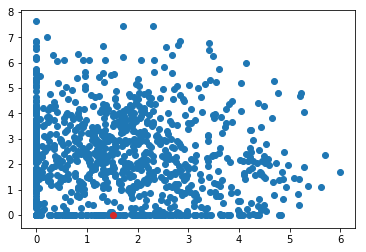

In [21]:
plt.scatter(w[:, 0], w[:, 1])
plt.scatter(w[555, 0], w[555, 1], c = 'C3')

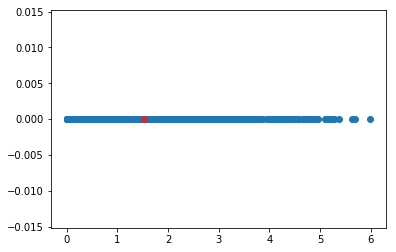

In [22]:
plt.scatter(w[:, 0], w[:, 2])
plt.scatter(w[555, 0], w[555, 2], c = 'C3')

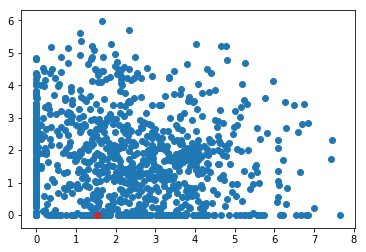

In [26]:
plt.scatter(w[:, 1], w[:, 0])
plt.scatter(w[555, 0], w[555, 1], c = 'C3')

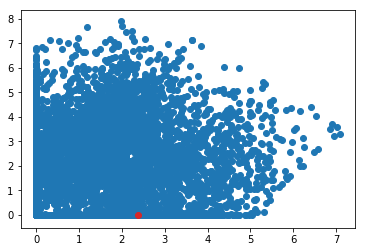

In [29]:
plt.scatter(z[:, 0], z[:, 1])
plt.scatter(z[555, 0], z[555, 1], c = 'C3')

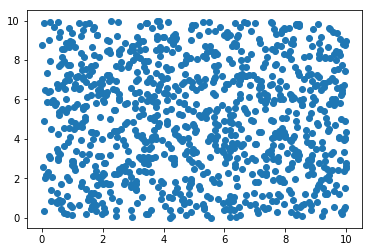

In [30]:
plt.scatter(lat[5000:,0], lat[5000:,1])

In [31]:
from sklearn.decomposition import PCA

In [32]:
pcs = PCA(n_components = 2)

In [33]:
q = pcs.fit_transform(lat)

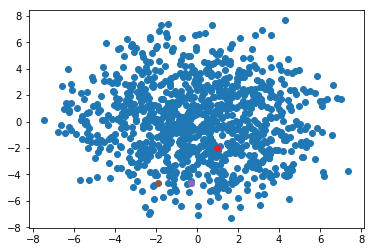

In [34]:
plt.figure()
plt.scatter(q[5000:, 0], q[5000:, 1])
plt.scatter(q[5555, 0], q[5555, 1], c= 'C3' )
plt.scatter(q[5505, 0], q[5505, 1], c= 'C4' )
plt.scatter(q[5005, 0], q[5505, 1], c= 'C5' )

In [35]:
other_pcs = PCA(n_components =2)

In [36]:
ww = other_pcs.fit_transform(w)

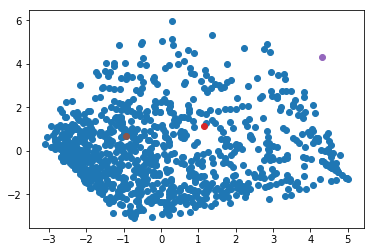

In [38]:
plt.figure()
plt.scatter(ww[:, 0], ww[:, 1])
plt.scatter(ww[555, 0], ww[555, 0], c= 'C3' )
plt.scatter(ww[505, 0], ww[505, 0], c= 'C4')
plt.scatter(ww[5, 0], ww[5, 1], c= 'C5' )

In [48]:
cols = ['lat1', 'lat2', 'lat3', 'lat4', 'auto1', 'auto2', 'auto3', 'auto4',  'latpc1', 'latpc2', 'auto_pc1', 'auto_pc2']

In [49]:
lat[5000:, :].shape

(1000, 4)

In [50]:
dat = np.concatenate([lat[5000:, :], w, q[5000:, :], ww], axis = 1)

In [51]:
dat.shape

(1000, 12)

In [52]:
import pandas as pd

In [53]:
df = pd.DataFrame(data = dat, columns = cols)

In [54]:
df.head()

,lat1,lat2,lat3,lat4,auto1,auto2,auto3,auto4,latpc1,latpc2,auto_pc1,auto_pc2
0,8.559633,5.695681,8.900522,3.078444,2.627213,1.142479,0.0,1.152484,-0.483325,-4.687979,3.365657,-0.316765
1,9.769262,8.378733,1.564466,8.531548,3.004864,0.000000,0.0,0.624794,-4.025781,-1.435640,4.248489,-1.289594
2,7.957268,8.319211,5.070551,4.376219,0.991920,0.000000,0.0,1.638130,-0.036419,-3.226229,2.941592,-1.188100
3,3.141832,0.762819,2.389125,8.304717,2.194276,3.614842,0.0,6.307828,-2.715457,5.224396,-2.268317,0.455879
4,3.213786,8.103824,0.630816,5.852218,0.277657,1.350950,0.0,5.965645,1.742773,2.086353,-1.646510,-1.138283


In [55]:
df['color'] = df['lat1']*df['lat2']*df['lat3'] *df['lat4']

In [56]:
import matplotlib
cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(df.color), vmax=max(df.color))
colors = [cmap(normalize(i)) for i in df.color]

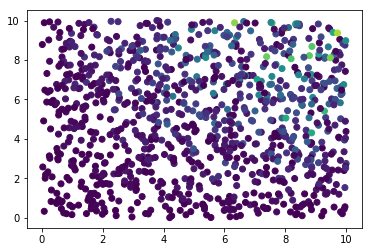

In [61]:
plt.scatter(df.lat1, df.lat2, c =colors)

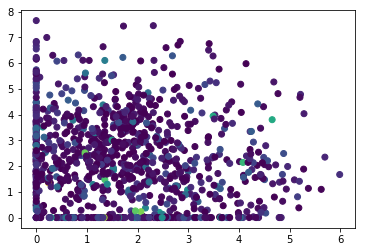

In [62]:
plt.scatter(df.auto1, df.auto2, c =colors)

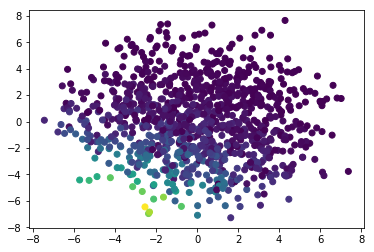

In [63]:
plt.scatter(df.latpc1, df.latpc2, c =colors)

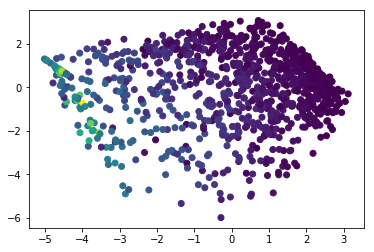

In [69]:
plt.scatter(df.auto_pc1, df.auto_pc2, c =colors)

In [65]:
pc_over_all = PCA(n_components = 2)

In [66]:
pc_over_samples = pc_over_all.fit_transform(samp[5000:, :])

Text(0,0.5,'pc2')

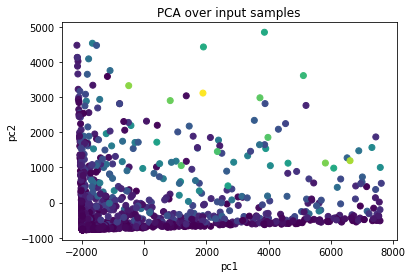

In [67]:
plt.scatter(pc_over_samples[:, 0], pc_over_samples[:, 1], c =colors)
plt.title('PCA over input samples')
plt.xlabel('pc1')
plt.ylabel('pc2')